# Image Classification of Documents

### 1.0 Import packages and libraries
Import the packages and libraries that you'll use:

In [1]:
import os, random
import numpy as np
import pandas as pd
import PIL
import keras
import itertools
from PIL import Image

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
# from skimage import feature, data, io, measure
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
from matplotlib import ticker
import seaborn as sns
%matplotlib inline 

from keras import backend as K
from keras.models import Sequential
from keras.layers import Input, Dropout, Flatten, Conv2D, MaxPooling2D, Dense, Activation
from keras.optimizers import RMSprop, Adam
from keras.callbacks import ModelCheckpoint, Callback, EarlyStopping
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img


Using TensorFlow backend.


### 2 Global Variables 
Enter the batch size for training, testing and validation dataset

In [2]:
batch_size_train = 20
batch_size_val = 10
batch_size_test = 25
num_classes= 3
intereseted_folder='Cheque'
STANDARD_SIZE=(224,224)

# 3. Classification

## 3.1 Create the Datset

In [3]:
#Converting Data Format according to the backend used by Keras

classes_required = ['Cheque',  'Driving_License', 'Pancard',]

In [4]:
datagen=keras.preprocessing.image.ImageDataGenerator(data_format=K.image_data_format())

In [5]:
#Input the Training Data

train_path = r'D:\Training\UpdatedFile\DL\TransferLearning\Images\Train'
train_batches = ImageDataGenerator().flow_from_directory(train_path, target_size=(224,224), classes=classes_required, batch_size=batch_size_train)
type(train_batches)

Found 45 images belonging to 3 classes.


keras.preprocessing.image.DirectoryIterator

In [6]:
train_batches.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2])

In [7]:
#Input the Validation Data
val_path = r'D:\Training\UpdatedFile\DL\TransferLearning\Images\Val'
val_batches = ImageDataGenerator().flow_from_directory(val_path, target_size=(224,224), classes=classes_required, batch_size=batch_size_val)


Found 12 images belonging to 3 classes.


In [8]:
#Input the Test Data
test_path = r'D:\Training\UpdatedFile\DL\TransferLearning\Images\Val'
test_batches = ImageDataGenerator().flow_from_directory(test_path, target_size=(224,224), classes=classes_required, batch_size=batch_size_test)


Found 12 images belonging to 3 classes.


In [9]:
# next(test_batches)

In [10]:
train_imgs, train_labels = next(train_batches)


In [11]:
# train_imgs

In [12]:
# train_labels

In [13]:
test_imgs, test_labels = next(test_batches)

In [14]:
# test_imgs

In [15]:
# test_labels

In [16]:
# y_test= [ np.where(r==1)[0][0] for r in test_labels ]
# y_test

## 3.2 Build the Model

In [17]:
model = keras.applications.InceptionV3()

In [18]:
model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 299, 299, 3)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 149, 149, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 149, 149, 32) 96          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 149, 149, 32) 0           batch_normalization_1[0][0]      
_______________________________________________________________________________________

In [19]:
model.layers

In [20]:
vgg16_model = keras.applications.vgg16.VGG16()
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [21]:
type(vgg16_model) #This is a Keras Functional API need to convert to sequential

keras.engine.training.Model

In [22]:
vgg16_model.layers

In [23]:
model = Sequential() #Iterate over the functional layers and add it as a stack
for layer in vgg16_model.layers:
    model.add(layer)

In [24]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [25]:
for layer in model.layers: #Since the model is already trained with certain weights, we dont want to change it. Let it be the same
    layer.trainable = False

In [26]:
model.add(Dense(3, activation='softmax')) # Add the last layer

In [27]:
model.summary()



Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [28]:
# Complie the model
model.compile(Adam(lr=.00015), loss='categorical_crossentropy', metrics=['accuracy'])

## 3.3 Train the Model

The model will take about 30-45 minutes to train. 

In [29]:
model.fit_generator(train_batches, steps_per_epoch=20, 
                    validation_data=val_batches, validation_steps=20, epochs=30, verbose=1)

Epoch 1/30
20/20 [==============================] - 74s 4s/step - loss: 1.0953 - accuracy: 0.4645 - val_loss: 1.0821 - val_accuracy: 0.5000
Epoch 2/30
20/20 [==============================] - 79s 4s/step - loss: 1.0946 - accuracy: 0.4964 - val_loss: 1.0661 - val_accuracy: 0.5000
Epoch 3/30
20/20 [==============================] - 83s 4s/step - loss: 1.0906 - accuracy: 0.5161 - val_loss: 1.0713 - val_accuracy: 0.5000
Epoch 4/30
20/20 [==============================] - 78s 4s/step - loss: 1.0904 - accuracy: 0.5356 - val_loss: 1.0896 - val_accuracy: 0.5000
Epoch 5/30
20/20 [==============================] - 82s 4s/step - loss: 1.0879 - accuracy: 0.5290 - val_loss: 1.0812 - val_accuracy: 0.5833
Epoch 6/30
20/20 [==============================] - 80s 4s/step - loss: 1.0864 - accuracy: 0.5627 - val_loss: 1.0847 - val_accuracy: 0.5833
Epoch 7/30
20/20 [==============================] - 84s 4s/step - loss: 1.0851 - accuracy: 0.5581 - val_loss: 1.0841 - val_accuracy: 0.5833
Epoch 8/30
20/20 [==

In [39]:
%pwd

'C:\\Users\\Archit\\ATraining\\PGA16\\DeepLearning_NLP\\Transfer'

In [40]:
model.save_weights('my_model_weights.h5')
model.load_weights('my_model_weights.h5')

In [41]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [42]:
model.get_weights()

[array([[[[ 4.29470569e-01,  1.17273867e-01,  3.40129584e-02, ...,
           -1.32241577e-01, -5.33475243e-02,  7.57738389e-03],
          [ 5.50379455e-01,  2.08774377e-02,  9.88311544e-02, ...,
           -8.48205537e-02, -5.11389151e-02,  3.74943428e-02],
          [ 4.80015397e-01, -1.72696680e-01,  3.75577137e-02, ...,
           -1.27135560e-01, -5.02991639e-02,  3.48965675e-02]],
 
         [[ 3.73466998e-01,  1.62062630e-01,  1.70863140e-03, ...,
           -1.48207128e-01, -2.35300660e-01, -6.30356818e-02],
          [ 4.40074533e-01,  4.73412387e-02,  5.13819456e-02, ...,
           -9.88498852e-02, -2.96195745e-01, -7.04357103e-02],
          [ 4.08547401e-01, -1.70375049e-01, -4.96297423e-03, ...,
           -1.22360572e-01, -2.76450396e-01, -3.90796512e-02]],
 
         [[-6.13601133e-02,  1.35693997e-01, -1.15694344e-01, ...,
           -1.40158370e-01, -3.77666801e-01, -3.00509870e-01],
          [-8.13870355e-02,  4.18543853e-02, -1.01763301e-01, ...,
           -9.431

## 3.4 Test the Model with External Test Images

In [43]:
zip_ref = 'D:/Training/UpdatedFile/DL/TransferLearning/Images'

In [44]:
paths = [zip_ref+"/gh.jpg", zip_ref+"/new1.jpg",zip_ref+"/th.jpg",  zip_ref+"/th2.jpg",zip_ref+"/th3.jpg"]

In [45]:
paths

['D:/Training/UpdatedFile/DL/TransferLearning/Images/gh.jpg',
 'D:/Training/UpdatedFile/DL/TransferLearning/Images/new1.jpg',
 'D:/Training/UpdatedFile/DL/TransferLearning/Images/th.jpg',
 'D:/Training/UpdatedFile/DL/TransferLearning/Images/th2.jpg',
 'D:/Training/UpdatedFile/DL/TransferLearning/Images/th3.jpg']

In [46]:
X_test=[]
def convert_to_image(X):
    '''Function to convert all Input Images to the STANDARD_SIZE and create Training Dataset
    '''
    for f in paths:
        #fobj=get_file(f)
        #print(type(fobj))predictions= model.predict(X_test)
        if os.path.isdir(f):
            continue
        img= PIL.Image.open(f)
        img = img.resize(STANDARD_SIZE)
        img=np.array(img)
        X.append(img)
        #print(X_train)
    #print(len(X_train))
    return X
X_test=np.array(convert_to_image(X_test))
datagen.fit(X_test)

In [47]:
predictions= model.predict(X_test)
predictions

array([[0.33766153, 0.34466514, 0.3176732 ],
       [0.34335864, 0.3434371 , 0.31320417],
       [0.33151597, 0.34349233, 0.32499173],
       [0.34956416, 0.33150756, 0.31892827],
       [0.31338558, 0.3237165 , 0.36289793]], dtype=float32)

In [48]:
y_pred=[]
for i in range(len(predictions)):
    y_pred.append(np.argmax(predictions[i]))

In [49]:
y_pred

[1, 1, 1, 0, 2]

In [50]:
# 0: Cheq
# 1 : DL
# 2 : Pa

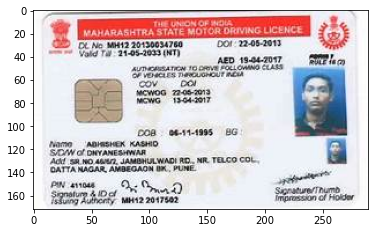

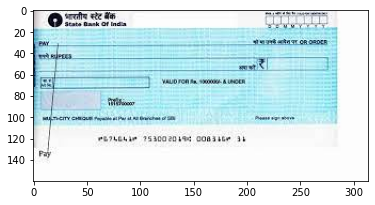

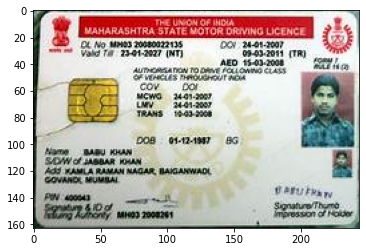

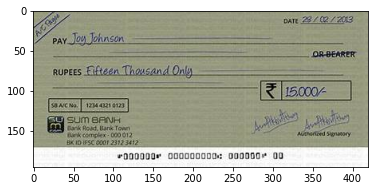

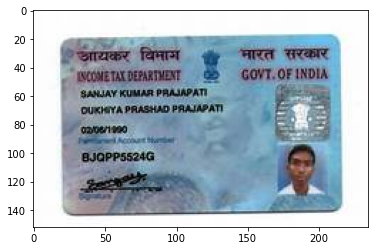

In [51]:
import matplotlib.pyplot as plt
for i in paths:
    plt.imshow(plt.imread(i))
    plt.show()

In [60]:
model_Inc = keras.applications.InceptionV3()

In [61]:
model_Inc.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            (None, 299, 299, 3)  0                                            
__________________________________________________________________________________________________
conv2d_189 (Conv2D)             (None, 149, 149, 32) 864         input_5[0][0]                    
__________________________________________________________________________________________________
batch_normalization_189 (BatchN (None, 149, 149, 32) 96          conv2d_189[0][0]                 
__________________________________________________________________________________________________
activation_189 (Activation)     (None, 149, 149, 32) 0           batch_normalization_189[0][0]    
_______________________________________________________________________________________

In [55]:
from keras.models import Sequential

In [62]:
model = Sequential() #Iterate over the functional layers and add it as a stack
for layer in model_Inc.layers:
    model.add(layer)

ValueError: Input 0 is incompatible with layer conv2d_195: expected axis -1 of input shape to have value 192 but got shape (None, 35, 35, 64)

In [58]:
for layer in pre_trained_model.layers:
  layer.trainable = False

In [ ]:
pre_trained_model()